In [1]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import math
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 12.1 Least Squares Problem

In [2]:
A,b = np.matrix([[2,0],[-1,1],[0,2]]), np.array([1,0,-1])
xhat = np.array([1/3,-1/3])
rhat = np.matmul(A,xhat) - b
npl.norm(rhat)
x = np.array([1/2,-1/2])
r = np.matmul(A,x) - b
npl.norm(r)
rhat

0.816496580927726

1.0

matrix([[-0.33333333, -0.66666667,  0.33333333]])

# 12.2 Solution

In [3]:
np.matmul(npl.inv(A.transpose()*A)*A.transpose(),b)  
np.matmul(npl.pinv(A),b)
np.matmul(np.matmul(A.transpose(),A),xhat) - np.matmul(A.transpose(),b)

matrix([[ 0.33333333, -0.33333333]])

matrix([[ 0.33333333, -0.33333333]])

matrix([[-2.22044605e-16,  2.22044605e-16]])

In [4]:
z = np.array([-1.1,2.3])
# np.shape(np.matmul(A,z))
# np.shape(rhat)
np.matmul(A,z) @ rhat.transpose() #J: (A*z)'*rhat; auto columning in Julia means we have to reverse the transpose order 

matrix([[2.22044605e-16]])

# 12.3 Solving Least Squares Problems

In [5]:
A,b = np.random.randn(100,20),np.random.randn(100)

In [6]:
x1 = npl.lstsq(A,b)[0] #lstsq gives the solution, residuals and rank, need to choose [0], 
                       #in Julia the backslash operator auto uses lstsq based on if given matrix is overdetermined 
x2 = np.matmul(npl.inv(np.matmul(A.transpose(),A)),np.matmul(A.transpose(),b))
x3 = np.matmul(npl.pinv(A),b)
Q,R = npl.qr(A)
x4 = npl.solve(R,(np.matmul(Q.transpose(),b)))

npl.norm(x1-x2)  
npl.norm(x2-x3)
npl.norm(x3-x4)

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


1.3420841513488284e-15

1.1860029236402488e-15

1.2164456932067798e-15

In [12]:
np.shape(A)

array([-0.29342607,  0.03988191,  1.71686803, -0.08960342, -0.19449585,
        2.34831266, -1.27657089,  0.38143991, -0.06604336, -0.26806188,
        0.89547526,  0.85285057,  2.21710014,  0.29008911, -0.51736698,
       -0.19327643, -1.36696655,  1.29335268,  0.3863149 ,  2.15174618,
       -0.53754741, -1.32774531, -0.18130505,  0.37947866,  1.14827145,
       -1.12230884, -2.31813797, -0.33344444, -0.08673728, -0.17636368,
        0.65503024,  0.39356489,  1.18228462, -0.65054473,  0.66231913,
        0.16246993,  0.24103338,  0.84061334, -0.18044394, -0.12678673,
       -0.59573565, -1.73316018, -0.9625673 , -1.07211399, -0.29199792,
       -1.04518092, -1.45186537,  0.81249613, -0.64152112, -1.07227572,
       -0.78019519, -0.49602235, -0.35803487,  0.83960475, -0.77634411,
       -1.80675356, -2.24399824, -0.70860633,  0.78635624,  1.70922774,
       -0.84440143, -0.17126014, -1.50564893, -0.01736174,  0.40230546,
        0.19863088,  1.39723774,  1.30365763,  0.84060143,  0.65

In [7]:
x1

array([-0.22860708,  0.0462826 ,  0.06892021,  0.06418885, -0.11654298,
        0.17136051, -0.17624683, -0.02376972,  0.07277802,  0.03337012,
       -0.14267652, -0.03832998,  0.21918719,  0.13679285,  0.19326027,
       -0.09690266, -0.13223342,  0.14614471, -0.15347465, -0.23077307])

#### Complexity: 
1. doubling m doubles compute time
2. doubling n quadruples compute time

In [7]:
m,n = 2000, 500
A,b = np.random.randn(m,n), np.random.randn(m)
%timeit npl.lstsq(A,b)

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


81.1 ms ± 8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
m,n = 4000, 500
A,b = np.random.randn(m,n), np.random.randn(m)
%timeit npl.lstsq(A,b)

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


124 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
m,n = 2000, 1000
A,b = np.random.randn(m,n), np.random.randn(m)
%timeit npl.lstsq(A,b)

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


311 ms ± 43.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
A,B = np.random.randn(1000,100), np.random.randn(1000,10)
X = npl.lstsq(A,B)[0]
x3 = npl.lstsq(A,B[:,3])[0]
npl.norm(X[:,3]-x3)

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


3.614235711934445e-16

# 12.4 Examples 

In [11]:
#advertising budget
R = np.matrix([[.97,1.86,.41],[1.23,2.18,.53],[.8,1.24,.62],[1.29,.98,.51],[1.1,1.23,.69],[.67,.34,.54],[.87,.26,.62],[1.1,.16,.48],[1.92,.22,.71],[1.29,.12,.62]])
m,n = np.shape(R)
vdes = 1e3 * np.ones(m)
s = npl.lstsq(R,vdes)[0]
s
#will be continued in 16 re: how to add a constraint like a total budget 

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


array([  62.07662454,   99.98500403, 1442.83746254])

In [12]:
rms = lambda x: np.sqrt(np.mean(np.square(x))) #not a built in numpy function
rms(np.matmul(R,s) - vdes)

132.63819026326522

In [143]:
#10 lamps each with an x,y position and a height above the floor
#goal: adjust light intensity for each lamp to get uniform lighting at the floor level
lamps = np.matrix([[4.1,20.4,4],[14.1,21.3,3.5],[22.6,17.1,6],[5.5,12.3,4.0],[12.2,9.7,4.0],[15.3,13.8,6],[21.3,10.5,5.5],[3.9,3.3,5.0],[13.1,4.3,5.0],[20.3,4.2,4.5]])
n = np.shape(lamps)[0]
N = int(max(np.ravel(lamps))+2.4) #grid size
m = N*N #pixel density
n,m

(10, 625)

In [144]:
#an m x 2 matrix with coordinates of pixel centers 
pixels = np.hstack((np.vstack([np.vstack(np.arange(.5,N,1)) for i in range(N)]),np.vstack([np.vstack(np.full(N,.5+i)) for i in range(N)])))
A = np.zeros((m,n))

In [156]:
for i in range(m):
    for j in range(n):
        A[i,j] = 1.0/np.square(npl.norm(np.hstack([pixels[i,:],[0]]) - lamps[j,:]))
A = m/sum(A) * A
x = npl.lstsq(A,np.ones((m,1)))[0]
rmsLS = rms(np.matmul(A,x) - 1)

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


rms(np.matmul(A,np.ones((n,1))) - 1)

(array([  7.,  13.,  35.,  58.,  78., 168., 156.,  69.,  35.,   6.]),
 array([0.53478587, 0.61503502, 0.69528417, 0.77553332, 0.85578247,
        0.93603162, 1.01628077, 1.09652992, 1.17677907, 1.25702821,
        1.33727736]),
 <a list of 10 Patch objects>)

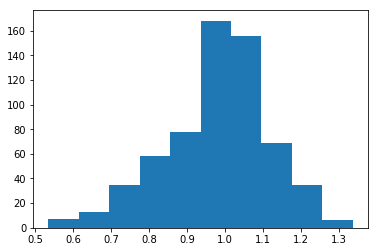

In [157]:
plt.hist(np.matmul(A,x)) 

(array([ 10.,  25.,  51.,  80.,  87., 113.,  94.,  99.,  50.,  16.]),
 array([ 4.35112509,  5.38933026,  6.42753542,  7.46574059,  8.50394576,
         9.54215092, 10.58035609, 11.61856126, 12.65676642, 13.69497159,
        14.73317676]),
 <a list of 10 Patch objects>)

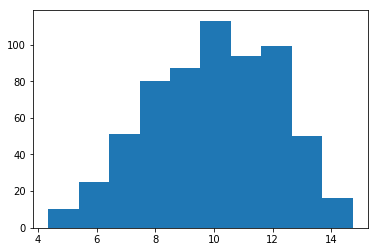

In [158]:
plt.hist(np.matmul(A,np.ones((n,1))))